<a href="https://www.kaggle.com/code/parthamajumdar/segmenting-customers-based-on-rfm-analysis?scriptVersionId=104469362" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Segmenting Customers based on Recency, Frequency and Monetary Value (RFM)

In any kind of business, we need to segment the customers. Customer segmentation is done so that we can plan exclusive treatment of each segment of customers. To state an example, when we started our business, we got business from the Ministries in Saudi Arabia and Bhutan, from private companies in Saudi Arabia, Egypt, Dubai, Australia and Bangladesh. In a very short period of time, we had to attend to more than 20 customers. Being a start up, we had limited resources. However, we endeavoured that none of our customers should ever face any difficulty with our services.

In order to be able to service our Customers effectively, we decided to assign specific people to a set of Customers. Having planned this, we needed to create these sets of Customers. So, we had to segment our customers so that customers with similar needs could be put in one group and thus we could assign them to one team of Engineers. Our segmentation was primarily on the basis of the type of business the customer was doing and the types of systems used to develop that customer's projects.

When we talk about large business houses, we know that thay have thousands and millions of customers. These customers need to be segmented so that specific products could be pushed to these customers and for many more requirements like promotions, etc. Now, segmenting these customer is not so easy as we are discussing a very large number of customers. So, here we need the machine to help us out. However, when we want the machine to help us, we need to build a basis on which the machine will process the data to produce the segmentation.

One such basis used by many companies is to check the customers on the basis of Recency, Frequency and  Monetary Value. We call this analysis as the **RFM analysis**.

**Recency** refers to how  recently the customer has been involved in business with the company. Generally, customers who have done business recently may be targeted with more products to gain their loyalty.

**Frequency** refers to how frequently does the customer conduct business with the company. Customer who do business with a company more frequently should be taken care by the company with more focused plans so the loyalty of these customers towards the company is kept intact.

**Monetary Value** refers to how much did the customers spend during the interactions with the company over a period of time. The company would definitely like to keep the high value customers happy and look to increase business from the relatively low value customers.

Now, we have established a basis on which we will segment our customers. So, let us look at our data using which we will extract these information about our customers before we can segment them.

## Dataset

The dataset is the Online Retail dataset obtained from UCI Machine Learning Repository. To know more about the dataset, [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail). It is a transnational dataset which contains all the transactions occurring between 01-Dec-2010 and 09-Dec-2011 for a UK-based and registered non-store online retail.

The dataset contains 541,909 records, and each record is made up of 8 fields.

The dataset contains 2 files with the same set of columns. We will use the file [Online_Retail_Train.csv](https://drive.google.com/file/d/162Jab4YZ5thL13_PhL3j8eQMrjBbozjb/view?usp=sharing) to create clusters of customers. Once we have the customers segmented, we will feed this data (transaction information along with the segment of the customer) to the machine and train the machine to determine the segment of the customers. Once we have a model for segmenting the customers, we will apply that model on new data to segment the customers. The test data for checking our customer segmentation model is [Online_Retail_Test.csv](https://drive.google.com/file/d/1_8mZTEOV3JVWmzh6FyGCLffL9KmSujIF/view?usp=sharing).

## Clustering

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more like each other than to objects in other clusters. **Similarity** is a measure that reflects the strength of the relationship between two data objects.

For clustering, we will use the **K-Means algorithm**.

Let us understand the K-means algorithm through an example. We will take an arbitrary example in 2-dimensional space so that it is easy to visualise.

Suppose that we have 10 points in a 2-dimensional space as given below.

(1,4), (5,6), (-8,3), (6,-5), (10,2), (-1,2), (7,3), (-6,4), (9,2), (-4,4)

We can treat these points as 10 records having 2 features - x1 and x2. We create a dataframe of these point and see what this looks like.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.DataFrame([(1,4), (5,6), (-8,3), (6,-5), (10,2), (-1,2), (7,3), (-6,4), (9,2), (-4,4)], 
                  columns = ['x1', 'x2'])
df

,x1,x2
0,1,4
1,5,6
2,-8,3
3,6,-5
4,10,2
5,-1,2
6,7,3
7,-6,4
8,9,2
9,-4,4


Let us create a Scatter Plot to visualise this data.

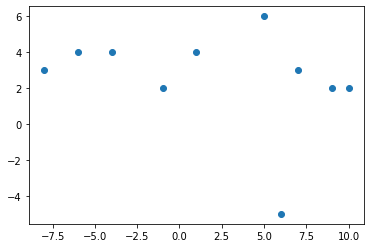

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df.x1, df.x2)
plt.show()

We can see that these points can be grouped in 2 or more number of groups. For a start (as we are understanding the concept), let us try to create 2 clusters from this data. **One point to note here is that to apply K-means algorithm, we need to define how many clusters we require. Later we will see how to determine the appropriate number of clusters to extract.**

So, we want to create 2 clusters from this data. Next, we have to select 1 point each for each of the 2 clusters which would be the **centroids** for these 2 clusters. Let us select the points (2,2) and (5,5) as our 2 centroids. Let us plot the centroids along with the points. The centroids are marked in red colour with 'x'.

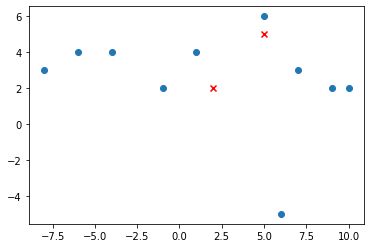

In [4]:
centroidsX = [2, 5]
centroidsY = [2, 5]

plt.scatter(df.x1, df.x2)
plt.scatter(centroidsX, centroidsY, marker = 'x', c = 'r')
plt.show()

We chose the centroids so that we will try to form a cluster around each of the centroids.

Now, we find the distance of each data point in our dataset to each of the centroids that we have selected. For a particular data point, the distance from the centroid which is the lowest, the data point will belong to that cluster.

Each data point can be defined as (x, y). So, our first data point can be definned as (x1, y1) and the centroids can be defined as (cx1, cy1) and (cx2, cy2). 

So, the distance between (x1, y1) and (cx1, cy1) = sqrt((cx1 - x1)^2 + (cy1 - y1)^2).

Here, **sqrt** is the square root and **^** is the power of.

Let us work it out manually.

In [5]:
df['Round1-Distance-C1'] = (((centroidsX[0] - df['x1'])**2) + ((centroidsY[0] - df['x2'])**2))**(1/2)
df['Round1-Distance-C2'] = (((centroidsX[1] - df['x1'])**2) + ((centroidsY[1] - df['x2'])**2))**(1/2)
df['Round1-Cluster'] = [0 if df['Round1-Distance-C1'][i] < df['Round1-Distance-C2'][i] else 1 
                        for i in range(len(df['Round1-Distance-C1']))]
df

,x1,x2,Round1-Distance-C1,Round1-Distance-C2,Round1-Cluster
0,1,4,2.236068,4.123106,0
1,5,6,5.000000,1.000000,1
2,-8,3,10.049876,13.152946,0
3,6,-5,8.062258,10.049876,0
4,10,2,8.000000,5.830952,1
5,-1,2,3.000000,6.708204,0
6,7,3,5.099020,2.828427,1
7,-6,4,8.246211,11.045361,0
8,9,2,7.000000,5.000000,1
9,-4,4,6.324555,9.055385,0


So, we can see that each of the data points have been assigned one cluster.

The next step is to calculate the new centroids. For this, we take the data points in each cluster separately and find the mean (in this case, the mean of the x-coordinate and the mean of the y-coordinate).

In [6]:
centroidsX[0] = df[df['Round1-Cluster'] == 0]['x1'].mean()
centroidsY[0] = df[df['Round1-Cluster'] == 0]['x2'].mean()

centroidsX[1] = df[df['Round1-Cluster'] == 1]['x1'].mean()
centroidsY[1] = df[df['Round1-Cluster'] == 1]['x2'].mean()

print('New Centroids X-coordinates', centroidsX)
print('New Centroids Y-coordinates', centroidsY)

New Centroids X-coordinates [-2.0, 7.75]
New Centroids Y-coordinates [2.0, 3.25]


Let us plot the new centroids along with the data points.

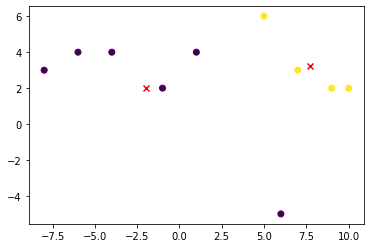

In [7]:
plt.scatter(df.x1, df.x2, c = df['Round1-Cluster'])
plt.scatter(centroidsX, centroidsY, marker = 'x', c = 'r')
plt.show()

Now, we repeat the process to find new cluster assignment and new centroids.

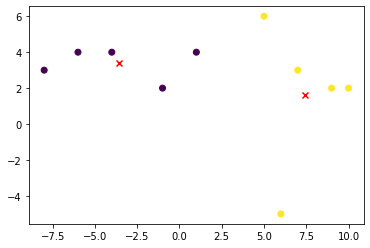

In [8]:
df['Round2-Distance-C1'] = (((centroidsX[0] - df['x1'])**2) + ((centroidsY[0] - df['x2'])**2))**(1/2)
df['Round2-Distance-C2'] = (((centroidsX[1] - df['x1'])**2) + ((centroidsY[1] - df['x2'])**2))**(1/2)
df['Round2-Cluster'] = [0 if df['Round2-Distance-C1'][i] < df['Round2-Distance-C2'][i] else 1 
                        for i in range(len(df['Round2-Distance-C1']))]

centroidsX[0] = df[df['Round2-Cluster'] == 0]['x1'].mean()
centroidsY[0] = df[df['Round2-Cluster'] == 0]['x2'].mean()

centroidsX[1] = df[df['Round2-Cluster'] == 1]['x1'].mean()
centroidsY[1] = df[df['Round2-Cluster'] == 1]['x2'].mean()

plt.scatter(df.x1, df.x2, c = df['Round2-Cluster'])
plt.scatter(centroidsX, centroidsY, marker = 'x', c = 'r')
plt.show()

We will repeat this process for one last time for understanding. We stop these iterations when the centroids have stabilised (or do not move too much).

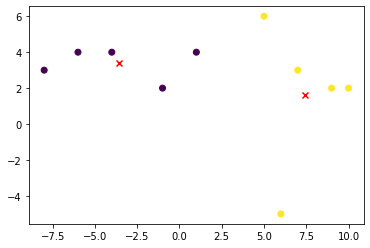

In [9]:
df['Round3-Distance-C1'] = (((centroidsX[0] - df['x1'])**2) + ((centroidsY[0] - df['x2'])**2))**(1/2)
df['Round3-Distance-C2'] = (((centroidsX[1] - df['x1'])**2) + ((centroidsY[1] - df['x2'])**2))**(1/2)
df['Round3-Cluster'] = [0 if df['Round3-Distance-C1'][i] < df['Round3-Distance-C2'][i] else 1 
                        for i in range(len(df['Round3-Distance-C1']))]

centroidsX[0] = df[df['Round3-Cluster'] == 0]['x1'].mean()
centroidsY[0] = df[df['Round3-Cluster'] == 0]['x2'].mean()

centroidsX[1] = df[df['Round3-Cluster'] == 1]['x1'].mean()
centroidsY[1] = df[df['Round3-Cluster'] == 1]['x2'].mean()

plt.scatter(df.x1, df.x2, c = df['Round3-Cluster'])
plt.scatter(centroidsX, centroidsY, marker = 'x', c = 'r')
plt.show()

So, we have divided the data points in 2 clusters. Now, let us use a metric to test how good this clustering has been. We can use the metric **inertia** as points of reference.

**To calculate the inertia, we compute the distance between each data points in each cluster from the corresponding centroid. Then we sum the squares of all these distances to obtain the value of inertia.**

In [10]:
distanceCluster = [0, 0]
for i in range(len(df)):
    for j in range(len(df['Round3-Cluster'].unique())):
        if j == df.loc[i, 'Round3-Cluster']:
            distanceCluster[j] += (((centroidsX[j] - df.loc[i, 'x1'])**2) + ((centroidsY[j] - df.loc[i, 'x2'])**2))**(1/2)

inertia = sum(distanceCluster)
print('Inertia', inertia)

Inertia 32.69973831880848


Lastly, in the process of understanding K-means clustering, let us try to create 3 clusters for the same data and check the value of inertia. We will compare the value of inertia between the exercise of creating 2 clusters and the exercise of creating 3 cluster to check which is better. **Remember that if the value of inertia is less, the clustering has been better.**

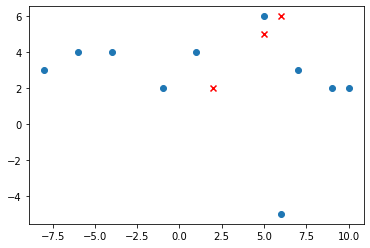

In [11]:
centroidsX = [2, 5, 6]
centroidsY = [2, 5, 6]

plt.scatter(df.x1, df.x2)
plt.scatter(centroidsX, centroidsY, marker = 'x', c = 'r')
plt.show()

Now, let us apply our first iteration.

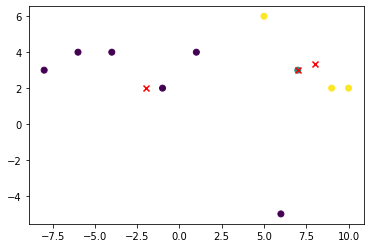

In [12]:
df['Round1-3c-Distance-C1'] = (((centroidsX[0] - df['x1'])**2) + ((centroidsY[0] - df['x2'])**2))**(1/2)
df['Round1-3c-Distance-C2'] = (((centroidsX[1] - df['x1'])**2) + ((centroidsY[1] - df['x2'])**2))**(1/2)
df['Round1-3c-Distance-C3'] = (((centroidsX[2] - df['x1'])**2) + ((centroidsY[2] - df['x2'])**2))**(1/2)
df['Round1-3c-Cluster'] = [0 if (df['Round1-3c-Distance-C1'][i] < df['Round1-3c-Distance-C2'][i] and
                                 df['Round1-3c-Distance-C1'][i] < df['Round1-3c-Distance-C3'][i]) 
                             else 1 if (df['Round1-3c-Distance-C2'][i] < df['Round1-3c-Distance-C1'][i] and
                                        df['Round1-3c-Distance-C2'][i] < df['Round1-3c-Distance-C3'][i])
                             else 2
                            for i in range(len(df['Round1-3c-Distance-C1']))]

for i in range(3):
    centroidsX[i] = df[df['Round1-3c-Cluster'] == i]['x1'].mean()
    centroidsY[i] = df[df['Round1-3c-Cluster'] == i]['x2'].mean()

plt.scatter(df.x1, df.x2, c = df['Round1-3c-Cluster'])
plt.scatter(centroidsX, centroidsY, marker = 'x', c = 'r')
plt.show()

We can see that 3 clusters have formed. We do one more iteration.

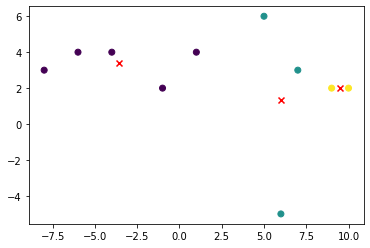

In [13]:
df['Round2-3c-Distance-C1'] = (((centroidsX[0] - df['x1'])**2) + ((centroidsY[0] - df['x2'])**2))**(1/2)
df['Round2-3c-Distance-C2'] = (((centroidsX[1] - df['x1'])**2) + ((centroidsY[1] - df['x2'])**2))**(1/2)
df['Round2-3c-Distance-C3'] = (((centroidsX[2] - df['x1'])**2) + ((centroidsY[2] - df['x2'])**2))**(1/2)
df['Round2-3c-Cluster'] = [0 if (df['Round2-3c-Distance-C1'][i] < df['Round2-3c-Distance-C2'][i] and
                                 df['Round2-3c-Distance-C1'][i] < df['Round2-3c-Distance-C3'][i]) 
                             else 1 if (df['Round2-3c-Distance-C2'][i] < df['Round2-3c-Distance-C1'][i] and
                                        df['Round2-3c-Distance-C2'][i] < df['Round2-3c-Distance-C3'][i])
                             else 2
                            for i in range(len(df['Round2-3c-Distance-C1']))]

for i in range(3):
    centroidsX[i] = df[df['Round2-3c-Cluster'] == i]['x1'].mean()
    centroidsY[i] = df[df['Round2-3c-Cluster'] == i]['x2'].mean()

plt.scatter(df.x1, df.x2, c = df['Round2-3c-Cluster'])
plt.scatter(centroidsX, centroidsY, marker = 'x', c = 'r')
plt.show()

We conduct one last iteration.

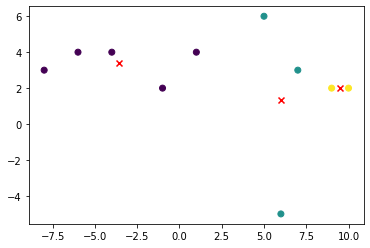

In [14]:
df['Round3-3c-Distance-C1'] = (((centroidsX[0] - df['x1'])**2) + ((centroidsY[0] - df['x2'])**2))**(1/2)
df['Round3-3c-Distance-C2'] = (((centroidsX[1] - df['x1'])**2) + ((centroidsY[1] - df['x2'])**2))**(1/2)
df['Round3-3c-Distance-C3'] = (((centroidsX[2] - df['x1'])**2) + ((centroidsY[2] - df['x2'])**2))**(1/2)
df['Round3-3c-Cluster'] = [0 if (df['Round3-3c-Distance-C1'][i] < df['Round3-3c-Distance-C2'][i] and
                                 df['Round3-3c-Distance-C1'][i] < df['Round3-3c-Distance-C3'][i]) 
                             else 1 if (df['Round3-3c-Distance-C2'][i] < df['Round3-3c-Distance-C1'][i] and
                                        df['Round3-3c-Distance-C2'][i] < df['Round3-3c-Distance-C3'][i])
                             else 2
                            for i in range(len(df['Round2-3c-Distance-C1']))]

for i in range(3):
    centroidsX[i] = df[df['Round3-3c-Cluster'] == i]['x1'].mean()
    centroidsY[i] = df[df['Round3-3c-Cluster'] == i]['x2'].mean()

plt.scatter(df.x1, df.x2, c = df['Round3-3c-Cluster'])
plt.scatter(centroidsX, centroidsY, marker = 'x', c = 'r')
plt.show()

We see that the Centroids have stabilised. So, we calculate the inertia.

In [15]:
distanceCluster = [0, 0, 0]
for i in range(len(df)):
    for j in range(len(df['Round3-3c-Cluster'].unique())):
        if j == df.loc[i, 'Round3-3c-Cluster']:
            distanceCluster[j] += (((centroidsX[j] - df.loc[i, 'x1'])**2) + ((centroidsY[j] - df.loc[i, 'x2'])**2))**(1/2)

inertia = sum(distanceCluster)
print('Inertia', inertia)

Inertia 29.25463903732281


We see that the inertia when we create 3 clusters is less than the inertia when we create 2 clusters. This implies that, for this data, it is better to create 3 clusters rather than 2 clusters. We can check the inertia value by increasing the number of clusters. When we see that the inertia value is not decreasing significantly, we can stop and use that number of clusters for our final solution. This method is called the **Elbow Method.**

## Performing Customer Segmentation based on RFM Analysis

Now that we have discussed how K-means Clustering works, let us apply the same to cluster customer from our dataset based on RFM Analysis.

### Load the data

In [16]:
dfMainTrain = pd.read_csv('../input/online-retail-dataset-obtained-from-uci/Online_Retail_Train.csv')
dfMainTest = pd.read_csv('../input/online-retail-dataset-obtained-from-uci/Online_Retail_Test.csv')

dfTrain = dfMainTrain.copy()
dfTest = dfMainTest.copy()

print('Training Data Shape:', dfTrain.shape)
print('Test Data Shape:', dfTest.shape)

Training Data Shape: (514813, 8)
Test Data Shape: (27096, 8)


In [17]:
dfTrain.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
dfTrain.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom
6,564758,84951A,SET OF 4 PISTACHIO LOVEBIRD COASTER,1,2011-08-30 10:39:00,2.46,NaN,United Kingdom
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium
8,575878,21519,GIN & TONIC DIET GREETING CARD,12,2011-11-11 13:29:00,0.42,13588.0,United Kingdom
9,571273,22898,CHILDRENS APRON APPLES DESIGN,8,2011-10-16 12:21:00,1.95,13034.0,United Kingdom


### Pre-process Data

First we check if duplicate data is available in the dataset.

In [19]:
# Find how may duplicate data exists
pd.DataFrame.duplicated(dfTrain, subset=None, keep= 'first').sum()

4754

There are 4754 duplicate rows out of 514813. So, we will eliminate the duplicate rows.

In [20]:
print('Before', dfTrain.shape)
dfTrain.drop_duplicates(keep= 'first', inplace = True)
print('After', dfTrain.shape)

Before (514813, 8)
After (510059, 8)


Let us find out the unique types of Invoices. We do this by finding out the first characters in the Invoice Numbers.

In [21]:
pd.DataFrame([inv[0] for inv in dfTrain.InvoiceNo], columns = ['InvStart'])['InvStart'].unique()

array(['5', 'C', 'A'], dtype=object)

We see that there are 3 types of Invoice Numbers.

1. Invoice Numbers which are entirely numbers. We will call these normal invoices.
2. Invoice Numbers starting with "C". These are Cancelled Invoices.
3. Invoice Numbers starting with "A". These are Adjusted Invoices.

In [22]:
# Classify the Invoices as Normal, Cancelled and Adjusted
dfTrain['InvoiceType'] = dfTrain['InvoiceNo'].astype(str).str[0]
dfTrain['InvoiceType'].replace('5', 'N', inplace = True)
dfTrain.InvoiceType.unique()

array(['N', 'C', 'A'], dtype=object)

We find out how many invoices of each type is present in the dataset.

In [23]:
print('\n\nTypes of Invoices\n', dfTrain.InvoiceType.value_counts())



Types of Invoices
 N    501293
C      8763
A         3
Name: InvoiceType, dtype: int64


We see that the number of Cancelled and Adjustment Invoices are relatively very few. So, we drop these rows.

In [24]:
print('Before', dfTrain.shape)
dfTrain = dfTrain[dfTrain.InvoiceType == 'N']
print('After', dfTrain.shape)

Before (510059, 9)
After (501293, 9)


Now we have all the invoices which have been for a sale of an item. We check if any Invoice has negative quantity.

In [25]:
print('Number of Invoices with negative quantity', len(dfTrain[dfTrain.Quantity < 0]))

Number of Invoices with negative quantity 1287


We will drop the invoices with negative quantity.

In [26]:
print('Before', dfTrain.shape)
dfTrain = dfTrain[dfTrain.Quantity > 0]
print('After', dfTrain.shape)

Before (501293, 9)
After (500006, 9)


Let us find the Stock Codes which are not items.

In [27]:
dfTrain['StockCodeType'] = ['Remove' if stockCode in ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES'] else 'Keep' for stockCode in dfTrain.StockCode ]
dfTrain.StockCodeType.value_counts()

Keep      497806
Remove      2200
Name: StockCodeType, dtype: int64

The records for Stock Codes which ae not items are relatively very few. So, we remove them.

In [28]:
print('Before', dfTrain.shape)
dfTrain = dfTrain[dfTrain.StockCodeType == 'Keep']
print('After', dfTrain.shape)

Before (500006, 10)
After (497806, 10)


We create an extra column to record the Week Day of the Invoice Date.

In [29]:
dfTrain['InvWeekDay'] = pd.to_datetime(dfTrain.InvoiceDate).dt.dayofweek

We create a column to store the value of each invoice. The value of each invoice can be found by multiplying the Quantity and the Unit Price.

In [30]:
dfTrain['TotalAmount'] = dfTrain.Quantity * dfTrain.UnitPrice

We put together all the above actions we have performed into a single function so that we can apply this function on the test data.

**Function to preprocess the data**

In [31]:
def preProcessData(dataFrame):
    dataFrameCopy = dataFrame.copy()

    print('Removing duplicates', dataFrameCopy.shape)
    returnDF = dataFrameCopy.drop_duplicates(keep= 'first', inplace = False)

    # Classify the Invoices as Normal, Cancelled and Adjusted
    # Delete all the rows except for the Normal Invoices
    print('Keep only Normal Invoices', returnDF.shape)
    returnDF['InvoiceType1'] = returnDF['InvoiceNo'].astype(str).str[0]
    dfTemp = returnDF.copy()
    returnDF['InvoiceType'] = [invoiceType if invoiceType in ['C', 'A'] else 'N' for invoiceType in dfTemp.InvoiceType1]
    returnDF = returnDF[returnDF.InvoiceType == 'N']
    returnDF.drop(['InvoiceType', 'InvoiceType1'], axis = 1, inplace = True)

    # Delete the rows where Quantity is less than or equal to 0
    print('Remove rows with negative quantity', returnDF.shape)
    returnDF = returnDF[returnDF.Quantity > 0]

    # Classify the Invoices based on the Stock Code
    # Remove the rows with invalid Stock Codes
    print('Keep only valid Stock Code', returnDF.shape)
    dfTemp = returnDF.copy()
    returnDF['StockCodeType'] = ['Remove' if stockCode in ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES'] else 'Keep' 
                               for stockCode in dfTemp.StockCode ]
    returnDF = returnDF[returnDF.StockCodeType == 'Keep']
    returnDF.drop('StockCodeType', axis = 1, inplace = True)

    # Create a column to store the week day of the invoice date
    print('Add column to store week day of invoice date', returnDF.shape)
    returnDF['InvWeekDay'] = pd.to_datetime(returnDF.InvoiceDate).dt.dayofweek
    
    # Create a column to store the invoice amount
    print('Add column to store invoice amount', returnDF.shape)
    returnDF['TotalAmount'] = returnDF.Quantity * returnDF.UnitPrice

    # Check if we have clean data
    if returnDF.isnull().sum().sum() == 0:
        print('\nData is clean', returnDF.shape)
    else:
        print('\nMissing Data exists', returnDF.shape)
        print(returnDF.isnull().sum(), '\n')

    return returnDF

**Pre-process the  Data**

In [32]:
dfTrainToUse = preProcessData(dfMainTrain)
print('Original Data', dfMainTrain.shape)
print('Processed Data', dfTrainToUse.shape)

Removing duplicates (514813, 8)
Keep only Normal Invoices (510059, 8)
Remove rows with negative quantity (501293, 8)
Keep only valid Stock Code (500006, 8)
Add column to store week day of invoice date (497806, 8)
Add column to store invoice amount (497806, 9)

Missing Data exists (497806, 10)
InvoiceNo           0
StockCode           0
Description       548
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     125837
Country             0
InvWeekDay          0
TotalAmount         0
dtype: int64 

Original Data (514813, 8)
Processed Data (497806, 10)


The data we have is from 2010-2011. However, at the time of writing this article, we are in 2022. So, we will consider that we are on the date when the last of the invoices in this dataset was obtained. So, we find the last invoice date from this dataset and store it.

In [33]:
lastInvoiceDate = dfTrainToUse.InvoiceDate.max()
lastInvoiceDate

'2011-12-09 12:50:00'

### Feature Engineering and Transformation

From the above data, we extract the 2 features we are interested in, i.e., Recency, Frequency and Monetary value. We need this data at the Customer level as we will be clustering customers. So, we  group the above data w.r.t. Customers.

For the Monetary Value of each Customer, we can sum up the Invoice Amounts across all the In voices of each Customer.

For the Frequency, we can count the number of Invoices per Customer.

However, to find the Recency, we will capture the date of the last Invoice of the Customer. Then we will subtract this date from the **lastInvoiceDate**, which is the date of the last invoice in this dataset.

In [34]:
gb = dfTrainToUse.groupby('CustomerID')
counts = gb.size().to_frame(name = 'Frequency')
dfCustomerDF = \
(counts
    .join(gb.agg({'TotalAmount': 'sum'}).rename(columns={'TotalAmount': 'MonetaryValue'}))
    .join(gb.agg({'InvoiceDate': 'max'}).rename(columns={'InvoiceDate': 'MostRecentPurchase'}))
    .reset_index()
)

from datetime import datetime, date
dfCustomerDF['MostRecentPurchaseDate'] = pd.to_datetime(dfCustomerDF['MostRecentPurchase']).dt.date
dfCustomerDF['Recency'] = (datetime.strptime(dfTrain.InvoiceDate.max(), "%Y-%m-%d %H:%M:%S").date() - 
                           dfCustomerDF['MostRecentPurchaseDate']).dt.days
dfCustomerDF.drop(['MostRecentPurchaseDate', 'MostRecentPurchase'], axis = 1, inplace = True)
print('Shape of Customer Data:', dfCustomerDF.shape)
print('\n')
print(dfCustomerDF.head())

Shape of Customer Data: (4333, 4)


   CustomerID  Frequency  MonetaryValue  Recency
0     12346.0          1       77183.60      325
1     12347.0        171        4091.80        2
2     12348.0         26        1395.48       75
3     12349.0         67        1345.01       18
4     12350.0         16         294.40      310


We create this into a function so that we can apply it on any other dataset where we have to apply this formulation.

**Function for transforming the data**

In [35]:
def transformData(dataFrame):
  gb = dataFrame.groupby('CustomerID')
  counts = gb.size().to_frame(name = 'Frequency')
  dfCustomerDF = \
  (counts
      .join(gb.agg({'TotalAmount': 'sum'}).rename(columns={'TotalAmount': 'MonetaryValue'}))
      .join(gb.agg({'InvoiceDate': 'max'}).rename(columns={'InvoiceDate': 'MostRecentPurchase'}))
      .reset_index()
  )

  from datetime import datetime, date
  dfCustomerDF['MostRecentPurchaseDate'] = pd.to_datetime(dfCustomerDF['MostRecentPurchase']).dt.date
  dfCustomerDF['Recency'] = (datetime.strptime(dfTrain.InvoiceDate.max(), "%Y-%m-%d %H:%M:%S").date() - 
                            dfCustomerDF['MostRecentPurchaseDate']).dt.days
  dfCustomerDF.drop(['MostRecentPurchaseDate', 'MostRecentPurchase'], axis = 1, inplace = True)

  return dfCustomerDF

In [36]:
dfCustomerTrain = transformData(dfTrainToUse)
print('Shape of the Customer data:', dfCustomerTrain.shape)
print('\n')
print(dfCustomerTrain.head())

Shape of the Customer data: (4333, 4)


   CustomerID  Frequency  MonetaryValue  Recency
0     12346.0          1       77183.60      325
1     12347.0        171        4091.80        2
2     12348.0         26        1395.48       75
3     12349.0         67        1345.01       18
4     12350.0         16         294.40      310


### Scale the data

During the discussion on K-means clustering, you would have noticed that we calculate the distance of the data points from the centroids. Now, if a feature in the dataset has very high values compared to the other features, the distance calculations will get skewed towards that variable. So, before applying K-means clustering, we need to scale the data so that all the features have data in similar ranges.

So, we apply `StandardScaler` on the features.

In [37]:
dfCustomerTrainScaled = dfCustomerTrain.copy()
X = dfCustomerTrainScaled.drop('CustomerID', axis = 1)
y = dfCustomerTrainScaled['CustomerID']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XTrain = sc.fit_transform(X.to_numpy())
XTrain = pd.DataFrame(XTrain, columns=['Frequency', 'MonetaryValue', 'Recency'])
XTrain.head()

,Frequency,MonetaryValue,Recency
0,-0.397111,8.785658,2.324680
1,0.398556,0.253157,-0.900354
2,-0.280101,-0.061603,-0.171476
3,-0.088205,-0.067495,-0.740600
4,-0.326905,-0.190139,2.174911


### Apply K-means algorithm to identify a specific number of clusters

Now we apply K-Means clustering and try to determine what would be the best number of clusters to form. For doing this, we will create between 1 and 15 number of clusters. Then, we will use the Elbow method to establish the best number of clusters to form.

Apart from inertia, we will compute distortion which can make it easier for us to make the decision.

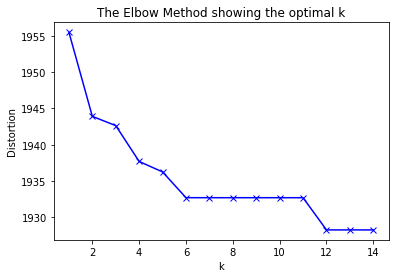

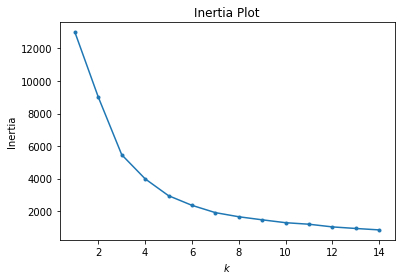

In [38]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

clusters = np.arange(1, 15)
inertia = []
distortions = []

for k in clusters:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(XTrain, y)
    inertia.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / XTrain.shape[0])

# Plot the elbow
plt.plot(clusters, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

plt.plot(clusters, inertia, marker= '.')
plt.title('Inertia Plot')
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

**From the above charts, we can conclude that creating 12 number of clusters could be optimum.**

So, we create 12 clusters and store the centroids.

In [39]:
kmeans = KMeans(n_clusters = 12, random_state = 42)
kmeans.fit(XTrain, y)
KMeansCentroids = kmeans.cluster_centers_
KMeansCentroids

array([[-0.14685688, -0.1062806 , -0.68313384],
       [-0.25618146, -0.1628228 ,  1.02683178],
       [ 8.25303143,  3.67978109, -0.8853768 ],
       [ 2.63016611, 15.48574396, -0.83445521],
       [21.89090973,  7.88566538, -0.90368195],
       [ 0.64960757,  0.25859738, -0.717834  ],
       [ 5.13043079, 30.06776889, -0.91033836],
       [-0.21791185, -0.12888186, -0.03835874],
       [ 0.52091463,  4.7673688 , -0.49193502],
       [ 2.31475458,  0.62240047, -0.80919411],
       [-0.29726542, -0.17828177,  2.16983704],
       [33.81186473,  4.27117347, -0.91033836]])

### Visualising the clusters

Now, we try to visualise the clusters. This is possible in our case as we have only 3 independent variables and we have the ability to create 3D charts.

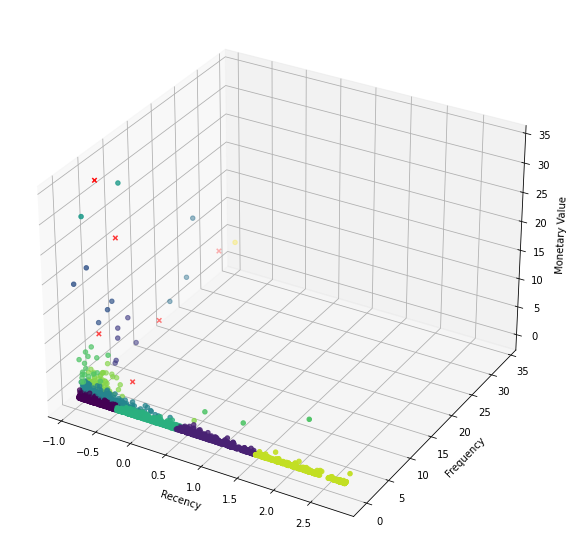

In [40]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection = '3d')

xs = XTrain.Recency
ys = XTrain.Frequency
zs = XTrain.MonetaryValue
ax.scatter(xs, ys, zs, marker = 'o', c = kmeans.labels_)

xs1 = KMeansCentroids.T[2]
ys1 = KMeansCentroids.T[1]
zs1 = KMeansCentroids.T[0]
ax.scatter(xs1, ys1, zs1, marker = 'x', c = 'r')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

plt.show()

## Train a Supervised Learning algorithm on segmented data

Now that we have clustered the training data, we can use this information to train a Supervised Learning model so that we can cluster other similar data. In our case, we have test dataset which we could cluster using the model we will develop now.

In [41]:
dfLabelled = XTrain.copy()
dfLabelled['Segment'] = kmeans.labels_
print(dfLabelled.head())
print('\n')
print(dfLabelled.Segment.value_counts())

   Frequency  MonetaryValue   Recency  Segment
0  -0.397111       8.785658  2.324680        8
1   0.398556       0.253157 -0.900354        5
2  -0.280101      -0.061603 -0.171476        7
3  -0.088205      -0.067495 -0.740600        0
4  -0.326905      -0.190139  2.174911       10


0     1701
7      907
1      587
5      506
10     494
9      100
8       21
2        6
3        5
4        3
6        2
11       1
Name: Segment, dtype: int64


### Create and test the model

In [42]:
X = dfLabelled.drop('Segment', axis = 1)
y = dfLabelled['Segment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

yPredTrain = rf.predict(X_train)
print('Training Accuracy:', accuracy_score(y_train, yPredTrain))

yPredTest = rf.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, yPredTest))

Training Accuracy: 1.0
Test Accuracy: 0.9896193771626297


### Evaluation of Test Data

Now that we have our model for Customer Segmentation, we will apply our model on the test data.

In [43]:
dfMainTest.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
3,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
4,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


We first pre-process the test data.

In [44]:
dfTestToUse = preProcessData(dfMainTest)
print('Original Data', dfMainTest.shape)
print('Processed Data', dfTestToUse.shape)

Removing duplicates (27096, 8)
Keep only Normal Invoices (27082, 8)
Remove rows with negative quantity (26591, 8)
Keep only valid Stock Code (26542, 8)
Add column to store week day of invoice date (26423, 8)
Add column to store invoice amount (26423, 9)

Missing Data exists (26423, 10)
InvoiceNo         0
StockCode         0
Description      38
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     6713
Country           0
InvWeekDay        0
TotalAmount       0
dtype: int64 

Original Data (27096, 8)
Processed Data (26423, 10)


Then we extract the features from the test data.

In [45]:
dfCustomerTest = transformData(dfTestToUse)
X = dfCustomerTest.drop(['CustomerID'], axis = 1)

XTest = sc.transform(X.to_numpy())
XTest = pd.DataFrame(XTest, columns=['Frequency','MonetaryValue', 'Recency'])
XTest.head()

,Frequency,MonetaryValue,Recency
0,-0.350307,-0.199035,-0.900354
1,-0.397111,-0.219632,2.254788
2,-0.378389,-0.211369,-0.740600
3,-0.392430,-0.217538,1.116541
4,-0.387750,-0.219680,1.396110


And lastly, we apply our model to segment the customers in the test data.

In [46]:
yPredTestData = rf.predict(XTest)
pd.DataFrame(yPredTestData).value_counts()

0     1539
7      834
1      515
10     414
5        5
dtype: int64

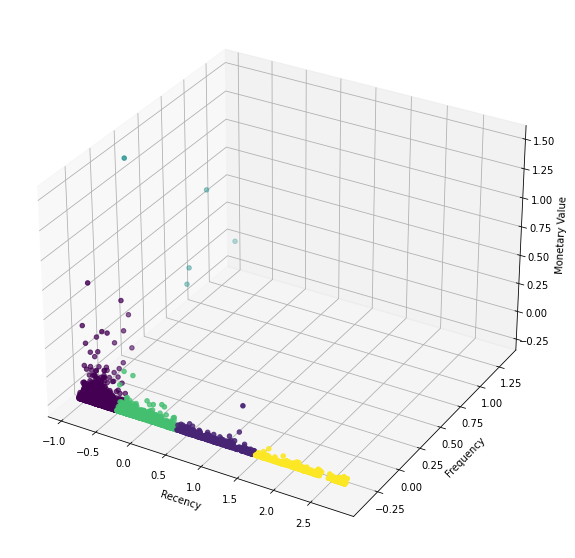

In [47]:
# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection = '3d')

xs = XTest.Recency
ys = XTest.Frequency
zs = XTest.MonetaryValue
ax.scatter(xs, ys, zs, marker = 'o', c = yPredTestData)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')

plt.show()